# Covid19 Data Analysis Project using Python

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go #to use plotly in an object-oriented way 
#plt.rcParams['figure.figsize']=20,12 #used to increase the size of the plot using pandas
import cufflinks as cf #it binds plotly with pandas together
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium # used for maps

In [2]:
# to connect plotly with jupyter notebook
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_excel(r"E:\Data\covid19ds_project\Covid cases in India.xlsx")
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [4]:
df.drop(columns={'S. No.'},axis=1,inplace=True)

In [5]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [6]:
# creating another column including the indian national and foreign national citizens in India
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [7]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [8]:
# total no. of cases in india
total_cases_overall=df['Total cases'].sum()
print("Total no. of cases in India:",total_cases_overall)

Total no. of cases in India: 729


In [9]:
df['Total active cases']= df['Total cases']-df['Cured'] - df['Death']
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [10]:
total_active_cases_overall = df['Total active cases'].sum()
print("Total no. of active cases in India:",total_active_cases_overall)

Total no. of active cases in India: 648


In [11]:
#displaying the numerical data in a more presentable form
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [12]:
Total_Active_cases= df.groupby('Name of State / UT')['Total active cases'].sum().sort_values(ascending=False).to_frame()

In [13]:
Total_Active_cases

,Total active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [14]:
Total_Active_cases.style.background_gradient(cmap='Reds')

,Total active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


## Graphical Representation of Data

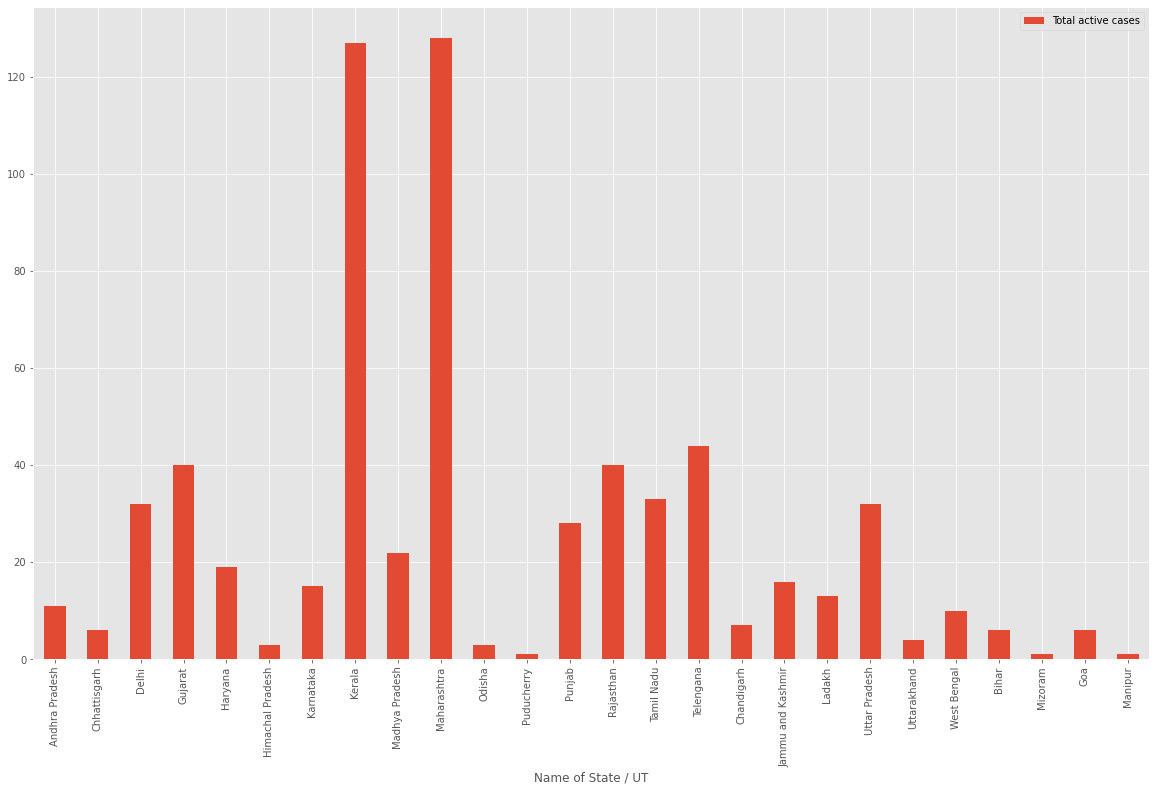

In [17]:
# 1. Pandas built in function for data visualization
df.plot(kind='bar',x='Name of State / UT',y='Total active cases',)

<BarContainer object of 26 artists>

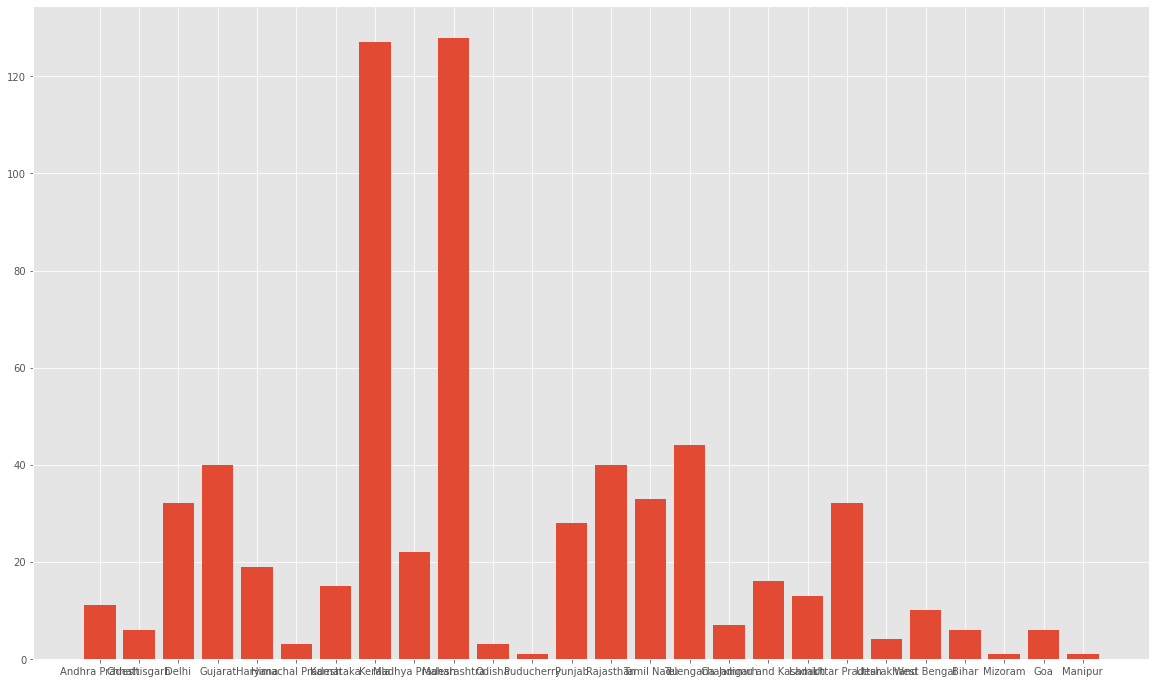

In [18]:
# 2. matplotlib visualization
plt.bar(df['Name of State / UT'],df['Total active cases'])

In [20]:
# 3.using plotly
df.iplot(kind='bar',x='Name of State / UT',y='Total active cases')

In [21]:
# 3. using plotly.express
px.bar(df,x='Name of State / UT',y='Total active cases')

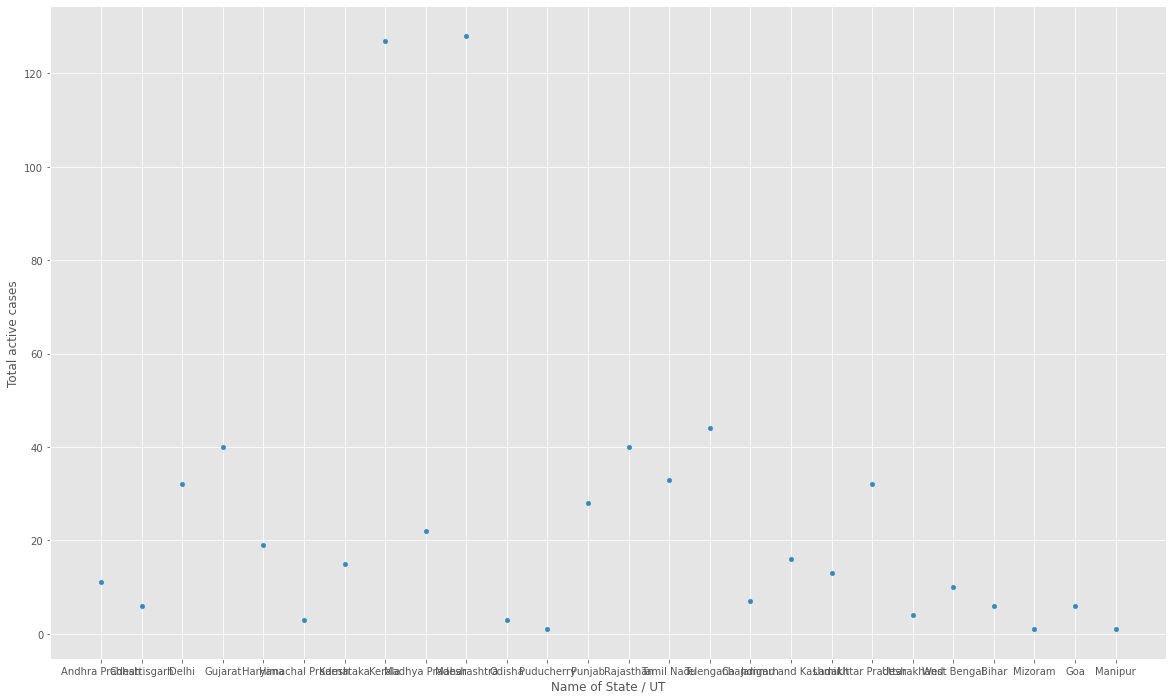

In [22]:
# Scatter plot using pandas
df.plot(kind='scatter',x='Name of State / UT',y='Total active cases')

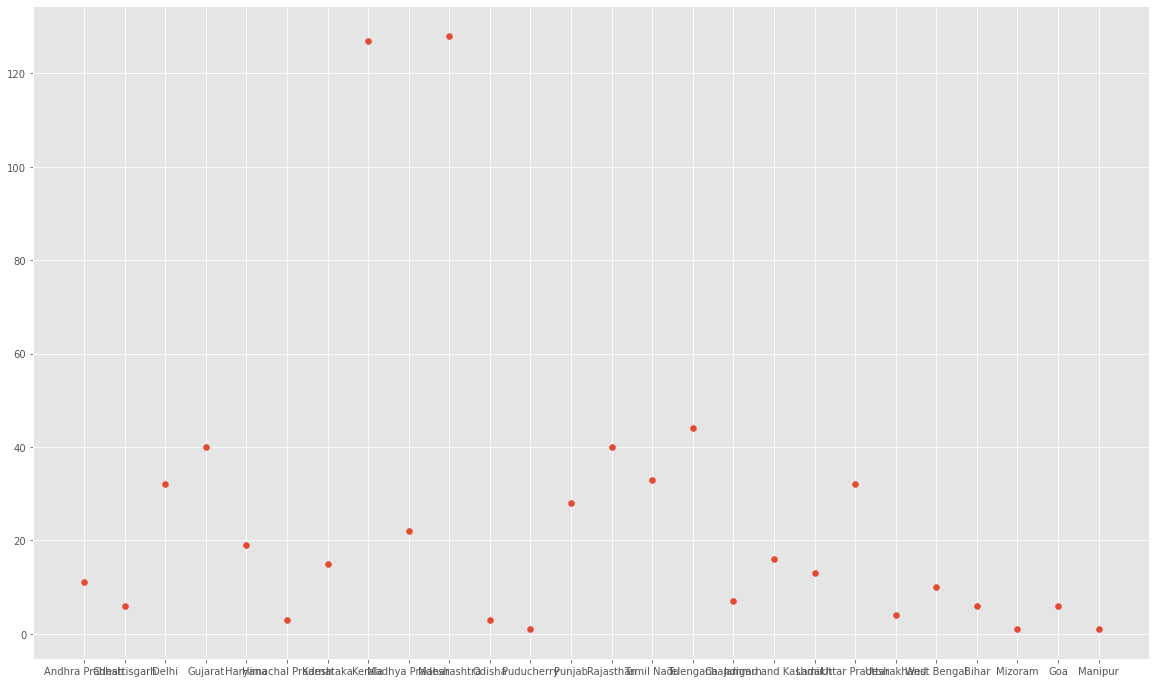

In [30]:
# 2. Scatter plot using matplotlib
plt.scatter(df['Name of State / UT'],df['Total active cases'])

In [25]:
# 3. using plotly
df.iplot(kind='scatter',x='Name of State / UT',y='Total active cases',xTitle='State/UT',yTitle='Active cases',mode='markers+lines')

In [34]:
# 4. using plotly express
px.scatter(df,x='Name of State / UT',y='Total active cases')

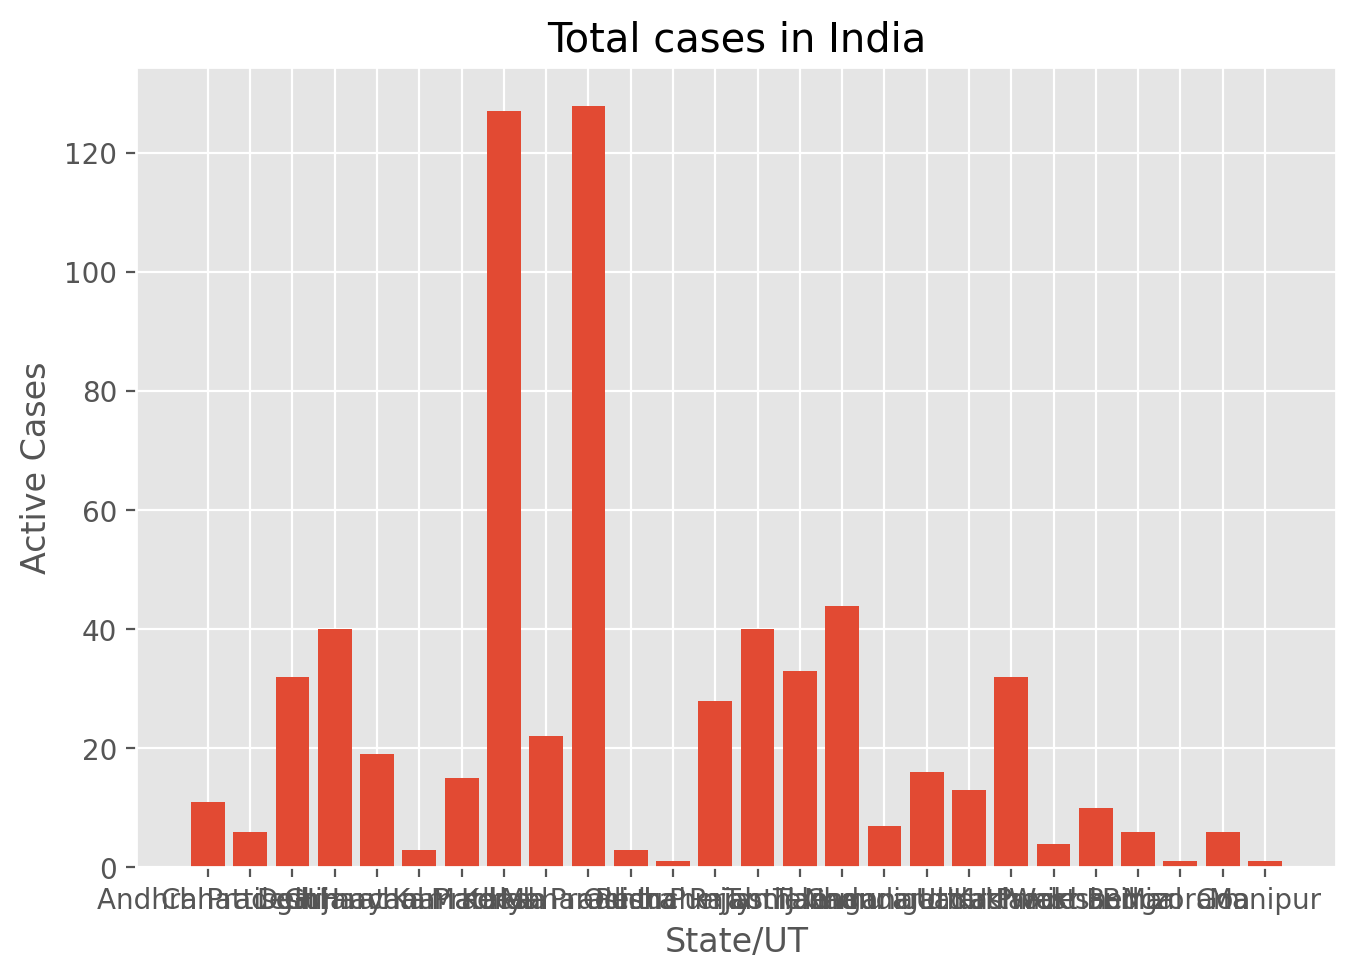

In [47]:
# object oriented visualization for matplotlib
fig=plt.figure(dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total active cases'])
axes.set_title("Total cases in India")
axes.set_xlabel("State/UT")
axes.set_ylabel("Active Cases")
plt.show()

# plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total active cases']))
fig.update_layout(title='Total cases in India',xaxis=dict(title='State/UT'),yaxis=dict(title='Active cases'))


In [48]:
coordinates=pd.read_excel(r"E:\Data\covid19ds_project\Indian Coordinates.xlsx")

In [49]:
coordinates

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [51]:
df_full= pd.merge(coordinates,df,on='Name of State / UT')
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total active cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [65]:
# using folium for maps
map=folium.Map(locations=[20,70],zoom_start=64,tieles='Stamenterrain')

for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+ '<br>''<strong>Total Cases</strong>: ' + str(value) +'<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    

In [66]:
map

## The rise of Coronavirus(Covid19) globally

In [68]:
pdc_India=pd.read_excel(r"E:\Data\covid19ds_project\per_day_cases.xlsx",parse_date=True,sheet_name="India")
pdc_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


In [69]:
pdc_Italy=pd.read_excel(r"E:\Data\covid19ds_project\per_day_cases.xlsx",parse_date=True,sheet_name="Italy")
pdc_Korea=pd.read_excel(r"E:\Data\covid19ds_project\per_day_cases.xlsx",parse_date=True,sheet_name="Korea")
pdc_Wuhan=pd.read_excel(r"E:\Data\covid19ds_project\per_day_cases.xlsx",parse_date=True,sheet_name="Wuhan")

In [70]:
pdc_Italy.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


In [71]:
pdc_Korea.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


In [72]:
pdc_Wuhan.head()

,Date,Total Cases,New Cases
0,2020-01-22,444,0
1,2020-01-23,444,0
2,2020-01-24,549,105
3,2020-01-25,761,212
4,2020-01-26,1058,297


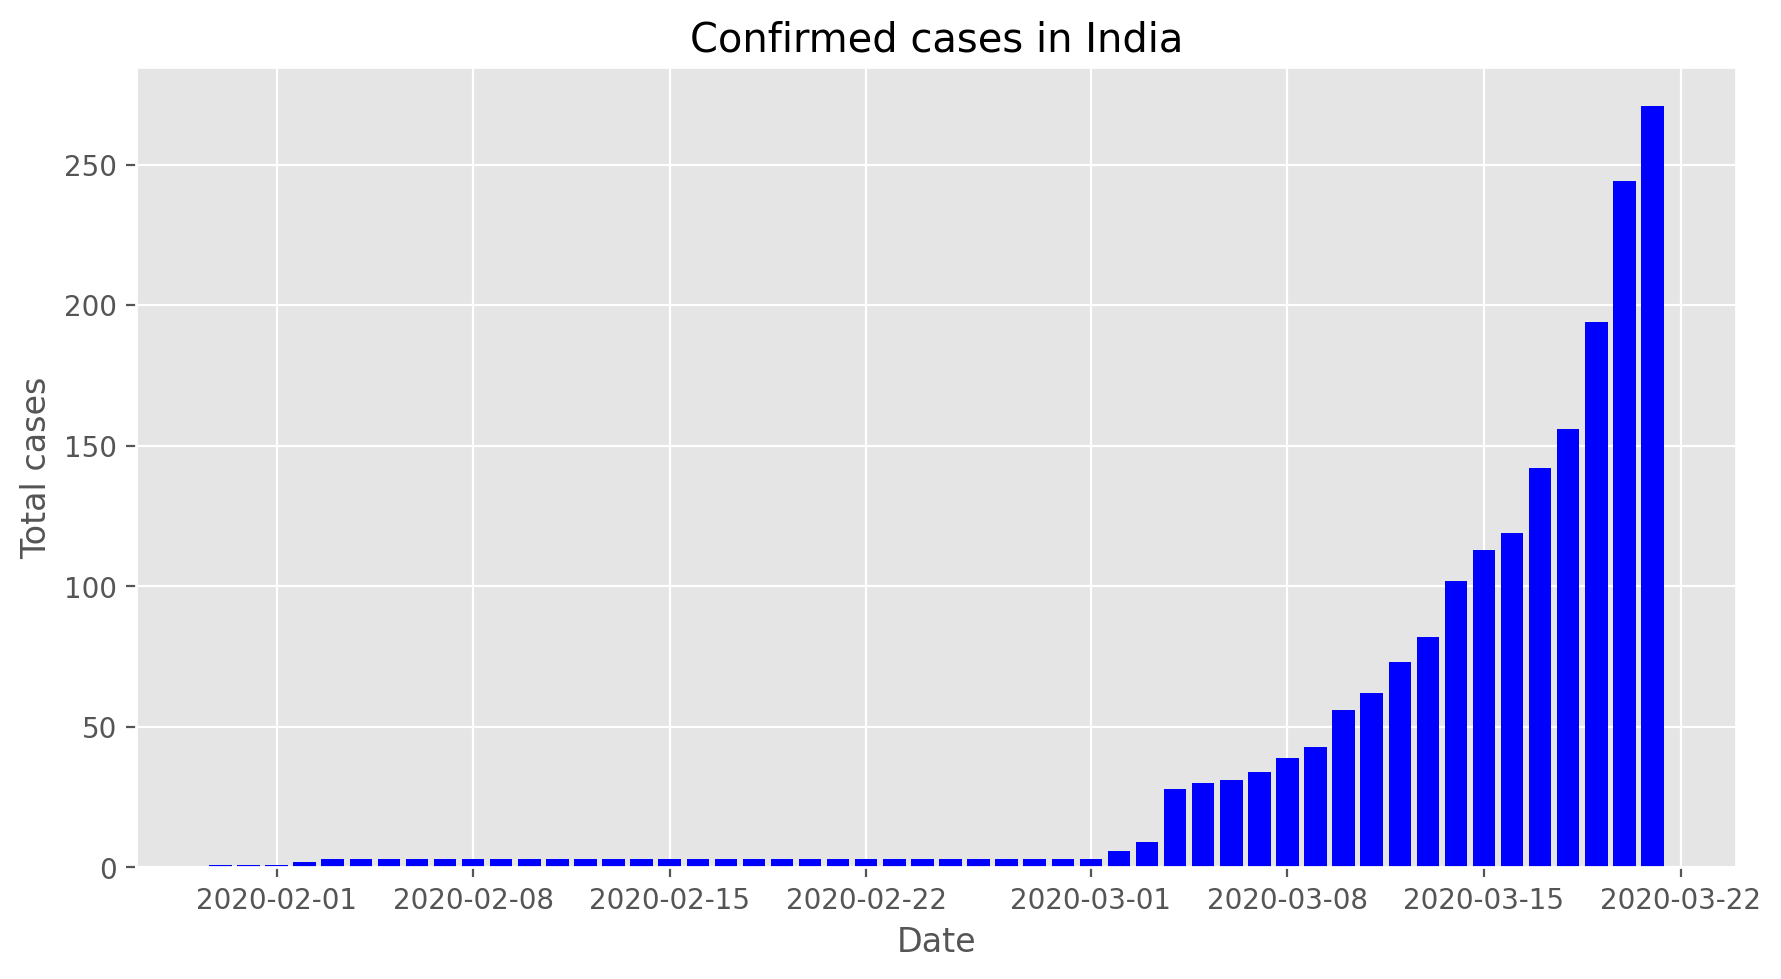

In [75]:
# data visualization using matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(pdc_India['Date'],pdc_India['Total Cases'],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total cases")
axes.set_title("Confirmed cases in India")
plt.show()

In [78]:
# visualization with plotly.express
fig=px.bar(pdc_India,x=pdc_India['Date'],y=pdc_India['Total Cases'],color='Total Cases',title="Confirmed cases in India")
fig.show()

In [80]:
# visualization with plotly.express
fig=px.bar(pdc_Italy,x=pdc_Italy['Date'],y=pdc_Italy['Total Cases'],color='Total Cases',title="Confirmed cases in Italy")
fig.show()

# visualization with plotly.express
fig=px.bar(pdc_Korea,x=pdc_Korea['Date'],y=pdc_Korea['Total Cases'],color='Total Cases',title="Confirmed cases in Korea")
fig.show()

# visualization with plotly.express
fig=px.bar(pdc_Wuhan,x=pdc_Wuhan['Date'],y=pdc_Wuhan['Total Cases'],color='Total Cases',title="Confirmed cases in Wuhan")
fig.show()

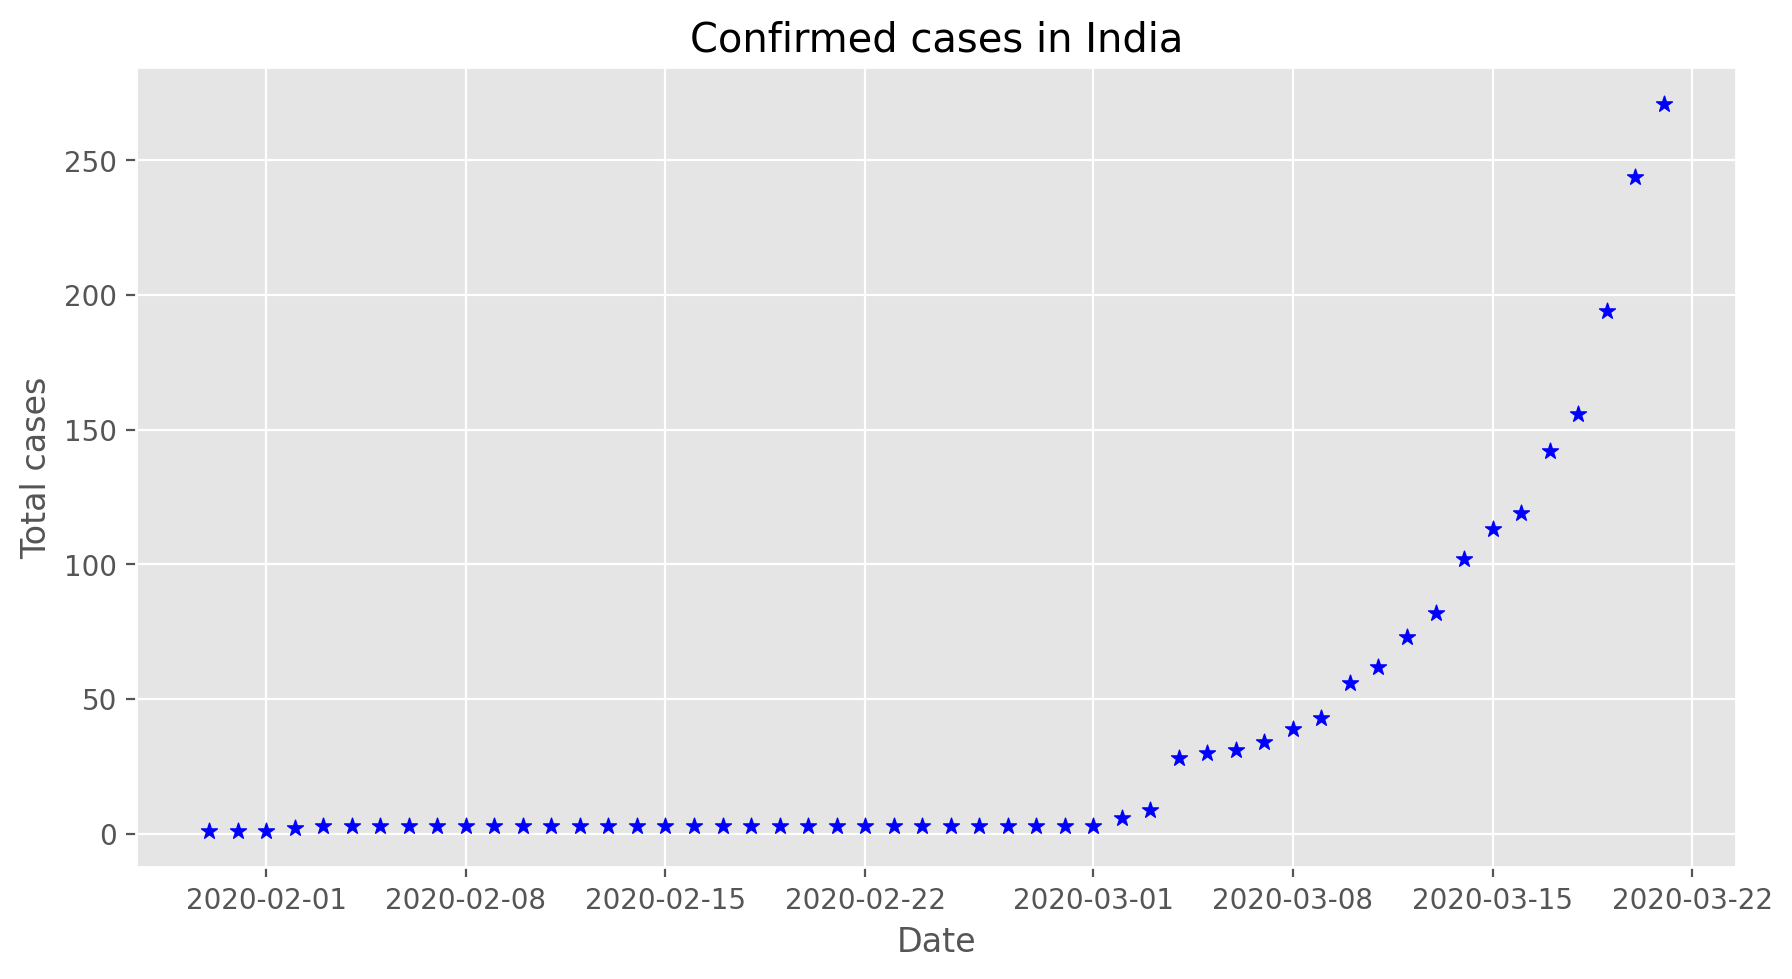

In [85]:
# scatter plot visualization of the data using matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(pdc_India['Date'],pdc_India['Total Cases'],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total cases")
axes.set_title("Confirmed cases in India")
plt.show()

In [86]:
# scatter plot visualization using plotly
pdc_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [89]:
# plotly visualization of the data
pdc_Italy.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')
pdc_Korea.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')
pdc_Wuhan.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [90]:
# visualization using plotly.graph_objects
fig=go.Figure()
fig.add_trace(go.Scatter(x=pdc_India['Date'],y=pdc_India['Total Cases'],mode='lines+markers'))

In [98]:
# Subplots using bar graph
# In subplots all the graphs can be compared side by side

from plotly.subplots import make_subplots

fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan")
)

fig.add_trace(go.Bar(x=pdc_Korea['Date'],y=pdc_Korea['Total Cases'],
                     marker=dict(color=pdc_Korea['Total Cases'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Bar(x=pdc_Italy['Date'],y=pdc_Italy['Total Cases'],
                     marker=dict(color=pdc_Italy['Total Cases'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Bar(x=pdc_India['Date'],y=pdc_India['Total Cases'],
                     marker=dict(color=pdc_India['Total Cases'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Bar(x=pdc_Wuhan['Date'],y=pdc_Wuhan['Total Cases'],
                     marker=dict(color=pdc_Wuhan['Total Cases'],coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text='Total cases in 4 countries')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [99]:
# subplots using scatter plots

from plotly.subplots import make_subplots

fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan")
)

fig.add_trace(go.Scatter(x=pdc_Korea['Date'],y=pdc_Korea['Total Cases'],
                     marker=dict(color=pdc_Korea['Total Cases'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Scatter(x=pdc_Italy['Date'],y=pdc_Italy['Total Cases'],
                     marker=dict(color=pdc_Italy['Total Cases'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Scatter(x=pdc_India['Date'],y=pdc_India['Total Cases'],
                     marker=dict(color=pdc_India['Total Cases'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Scatter(x=pdc_Wuhan['Date'],y=pdc_Wuhan['Total Cases'],
                     marker=dict(color=pdc_Wuhan['Total Cases'],coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text='Total cases in 4 countries')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

## Time Series of covid19

In [106]:
data=pd.read_csv("E:\Data\covid19ds_project\covid_19_data.csv",parse_dates=['Last Update'])
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [107]:
data.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [112]:
data.drop(columns=['SNo'],inplace=True)
data

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5885,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [113]:
data.groupby("Date").sum()

,Confirmed,Deaths,Recovered
Date,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0
01/27/2020,2927.0,82.0,61.0
01/28/2020,5578.0,131.0,107.0
01/29/2020,6165.0,133.0,126.0
01/30/2020,8235.0,171.0,143.0


In [117]:
confirmed=data.groupby("Date").sum()['Confirmed'].reset_index()
recovered=data.groupby("Date").sum()['Recovered'].reset_index()
deaths=data.groupby("Date").sum()['Deaths'].reset_index()

In [121]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name='recovered',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers',name='deaths',line=dict(color='yellow',width=2)))

In [125]:
df_confirmed=pd.read_csv(r"E:\Data\covid19ds_project\time_series_covid_19_confirmed.csv")
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [127]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [131]:
df_lat_long=pd.merge(data,df_confirmed,on=['Country','Province/State'])
df_lat_long.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,1/22/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
1,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
2,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
3,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
4,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572


In [136]:
fig=px.density_mapbox(df_lat_long,lat='Lat',lon='Long',hover_name="Province/State",hover_data=['Confirmed','Deaths','Recovered'],animation_frame="Date",color_continuous_scale='Portland',radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})

# End of Project